## Why is it important to forecast sales data?

## What can I bring for our company if you employ me? --Use Walmart as a case study

“The goal of forecasting is not to predict the future but to tell you what you need to know to take meaningful action in the present”. — Paul Saffo


Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor day. Here we are owing to Analyze the dataset given. before doing that , let me point out the objective of this analysis.


As in dataset size and time related data are given as feature, so Analyze if sales are impacted by time based factors and space based factor.
Most Importantly how inclusion of holidays in a week soar the sales in store?
2. Why this problem needs To be Solved?
Holidays can create a huge impact on sales. So, if there is a good prediction on Sales then Walmart can Calculate how much product to order during Holiday time. It will help in predicting which products needs to be purchased during the holiday time. As customers planning to buy something expects the products to be available immediately. And through prediction they can figure out which product will require at what time . Thus soar the trust of Customer on Walmart. This problem can also solve the issue of Marketing Campaigns. As Forecasting is often used to adjust ads and marketing campaigns and can influence the number of sales. Walmart runs several markdown events throughout the year. And these markdown event precede to the prominent holidays. So to solve the issue Walmart can organize such events more efficiently.

Why Accurate Sales Forecasting Matters
1. A sales forecast helps every business make better business decisions. It helps in overall business planning, budgeting, and risk management. 


2. Sales forecasting allows companies to efficiently allocate resources for future growth and manage its cash flow.


3. Sales forecasts help sales teams achieve their goals by identifying early warning signals in their sales pipeline and course-correct before it’s too late

4. Sales forecasting also helps businesses to estimate their costs and revenue accurately based on which they are able to predict their short-term and long-term performance.


Three important points why we need to forecast sales


1.Estimate future revenue.

2.Allocate resources. 


3.Plan your growth strategy. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
data = pd.read_csv('/users/arissa/Desktop/sales_data.csv')
stores=pd.read_csv('/users/arissa/Desktop/stores.csv')
features = pd.read_csv('/users/arissa/Desktop/features.csv')


In [3]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
stores
# There are 45 stores in this database 
# ABC three types represent Walmart Discount Store Stores, Walmart Supercenters, and Walmart Neighborhood Markets.

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Handling missing values of features dataset¶


In [8]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
# check the percentage of missing values 
features.isna().sum()/len(features)

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

In [10]:
# The Consumer Price Index (CPI) is a measure of the average change over time in the 
# prices paid by urban consumers for a market basket of consumer goods and services. 

In [11]:
# use median to fill missing values in CPI
features["CPI"].fillna(features["CPI"].median(), inplace=True)

In [12]:
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)


In [13]:
# fill mark down variables 
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

## Merging Training Dataset and merged stores-features Dataset


In [14]:
data=pd.merge(data, stores, on='Store', how='left')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [15]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False


In [16]:
data = pd.merge(data,features,on=['Store','Date'],how='left')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [17]:
data['Date'].nunique()

143

In [18]:
features['Date'].nunique()

182

In [19]:
# We can see that data's unique date is less than features, so when we use left join, there is still no missing values

In [20]:
# convert date to datetime
data['Date']=pd.to_datetime(data['Date'])
data['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [21]:
# date is a datetime subject now 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [22]:
# sort data by using datetime
data.sort_values(by=['Date'], inplace=True)

In [23]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


In [24]:
data.set_index(data.Date, inplace=True)


In [25]:
# we reset index because we want to focus on sales prediction, this is time-series analysis
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
2012-10-26,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
2012-10-26,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


In [26]:
# because "isHoliday" variable is repeated in two datasets, we drop one column 
data.drop(columns='IsHoliday_x', inplace=True)

In [27]:
data.rename(columns={'IsHoliday_y':'IsHoliday'}, inplace=True)
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


## Splitting Date Column¶


In [28]:

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-28-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [29]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,43
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43


## Outlier Detection and Abnormalities¶


In [30]:
# check month groupby, the median sales is the highest in December 
data.groupby(['Month']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()

,Month,max,min,mean,median,std
0,1,206871.52,-400.00,14126.075111,6134.210,21220.754522
1,2,293966.05,-1750.00,16008.779217,7694.815,22925.935446
2,3,214383.07,-1699.00,15416.657597,7490.700,21646.065918
3,4,224917.94,-698.00,15650.338357,7634.810,21625.703256
4,5,206160.36,-548.00,15776.337202,7742.745,21626.685866
5,6,206575.90,-594.00,16326.137002,7856.260,22082.802440
6,7,198349.17,-1098.00,15861.419650,7550.460,21704.257869
7,8,241120.00,-798.00,16062.516933,7818.880,22155.079986
8,9,214448.96,-3924.00,15095.886154,7179.490,21439.256090
9,10,221834.28,-4988.94,15243.855576,7341.525,21334.079444


In [31]:
agg_data=data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()


In [32]:
 # merge sales data 
store_data=pd.merge(left=data, right=agg_data,on=['Store', 'Dept'],how ='left')

In [33]:
store_data.dropna(inplace=True)

data=store_data.copy()

In [34]:
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.00,0.00,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.00,0.00,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.00,0.00,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.00,0.00,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,6152.59,129.77,...,6.170,False,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,148.32,6.73,...,10.199,False,2012,10,43,289.78,3.50,37.848679,31.365,34.065601
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,7756.75,206.45,...,8.000,False,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257


In [35]:
# add all mark down together
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [36]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,False,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,False,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,False,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [37]:
# create a separate numeric dataset 
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [38]:
data_numeric

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.00
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0.00
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0.00
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0.00
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0.00
...,...,...,...,...,...,...,...
2012-10-26,9258.88,202307,69.79,3.506,223.078337,6.170,9678.80
2012-10-26,53.12,39690,65.95,4.301,131.193097,10.199,502.88
2012-10-26,5339.65,204184,58.99,4.071,142.762411,8.000,10969.27


In [39]:
data.shape

(421533, 20)

In [40]:
stats.zscore(data_numeric)

array([[ 0.39371163,  0.23915453, -0.96379495, ...,  1.01876506,
         0.07820908, -0.45316376],
       [-0.67428669, -0.17872378, -1.19688139, ...,  1.10965326,
        -0.82932522, -0.45316376],
       [-0.67316877, -0.17872378, -1.19688139, ...,  1.10965326,
        -0.82932522, -0.45316376],
       ...,
       [-0.46861397,  1.10615119, -0.05963638, ..., -0.72626807,
         0.02132047,  0.29059008],
       [-0.25389523, -1.58777168,  0.77513832, ...,  1.30011206,
        -0.92968531, -0.36769418],
       [-0.65630827, -0.30355267, -0.06722524, ...,  0.5389927 ,
         0.37928936, -0.09738168]])

In [41]:
# we are removing ourliers
# only keep the absolute value of z-score less than 2.5, which means we keep 98% of our data 
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

In [42]:
## Negative Weekly Sales

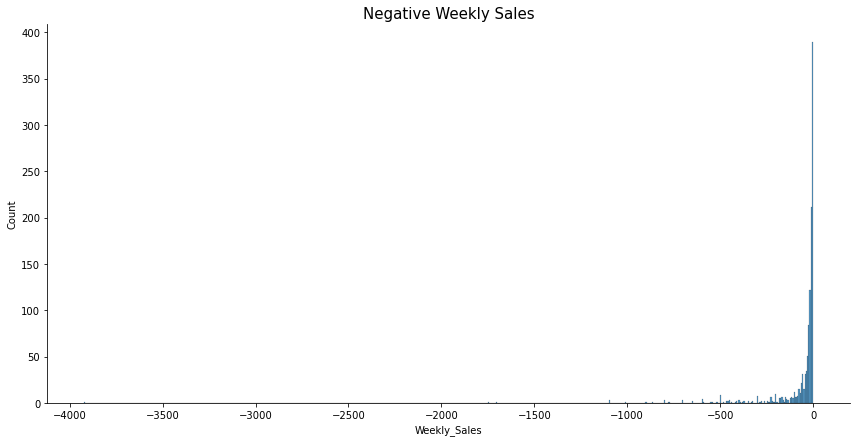

In [43]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [44]:
data=data[data['Weekly_Sales']>=0]
data.shape

(374247, 20)

In [45]:
data['IsHoliday']=data['IsHoliday'].astype('int')
data['IsHoliday']

Date
2010-02-05    0
2010-02-05    0
2010-02-05    0
2010-02-05    0
2010-02-05    0
             ..
2012-10-26    0
2012-10-26    0
2012-10-26    0
2012-10-26    0
2012-10-26    0
Name: IsHoliday, Length: 374247, dtype: int64

In [46]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


## Data Visuallizations¶

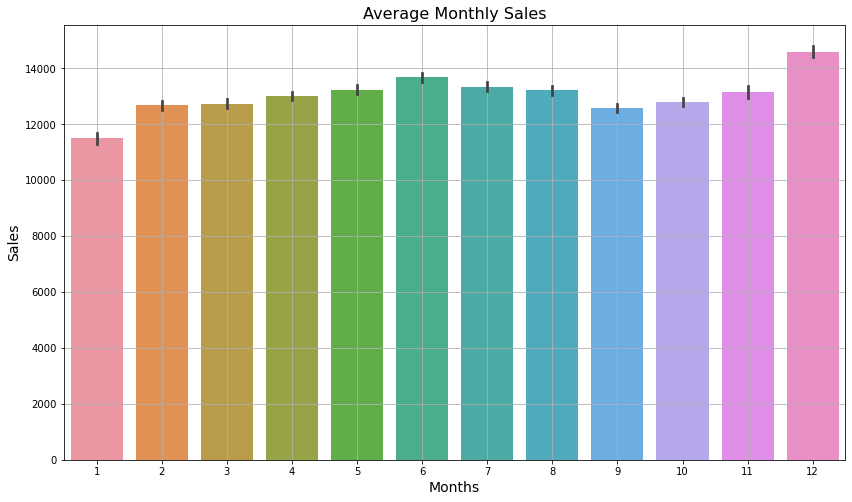

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [107]:
data.groupby(['IsHoliday']).Weekly_Sales.agg(['mean', 'median'])

,mean,median
IsHoliday,,
0,0.179672,0.097739
1,0.176623,0.095489


In [48]:
# December has the highest sales. This may be because of holiday seasons 
data.groupby(['Month']).Weekly_Sales.agg(['mean', 'median']).reset_index()

,Month,mean,median
0,1,11496.718529,5635.025
1,2,12677.136240,6999.745
2,3,12732.148472,7008.720
3,4,13009.724759,7191.365
4,5,13241.685149,7311.550
5,6,13676.283693,7451.070
6,7,13340.152302,7165.360
7,8,13213.136273,7279.410
8,9,12573.659138,6792.180
9,10,12794.335167,6946.130


##  Weekly Sales Store wise

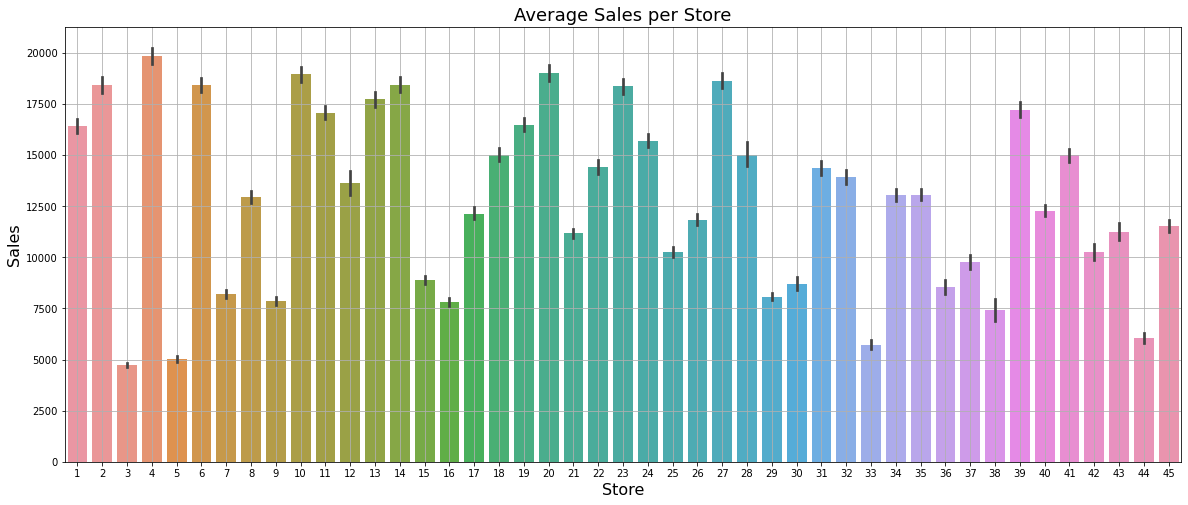

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

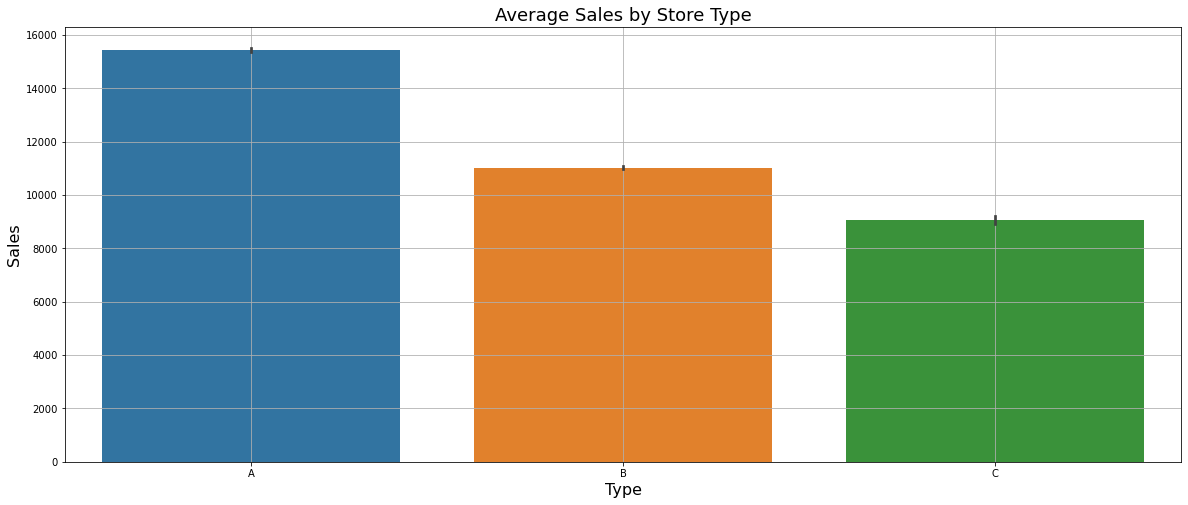

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(x='Type',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales by Store Type', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.show()

# Type A store often has the highest weekly sales 

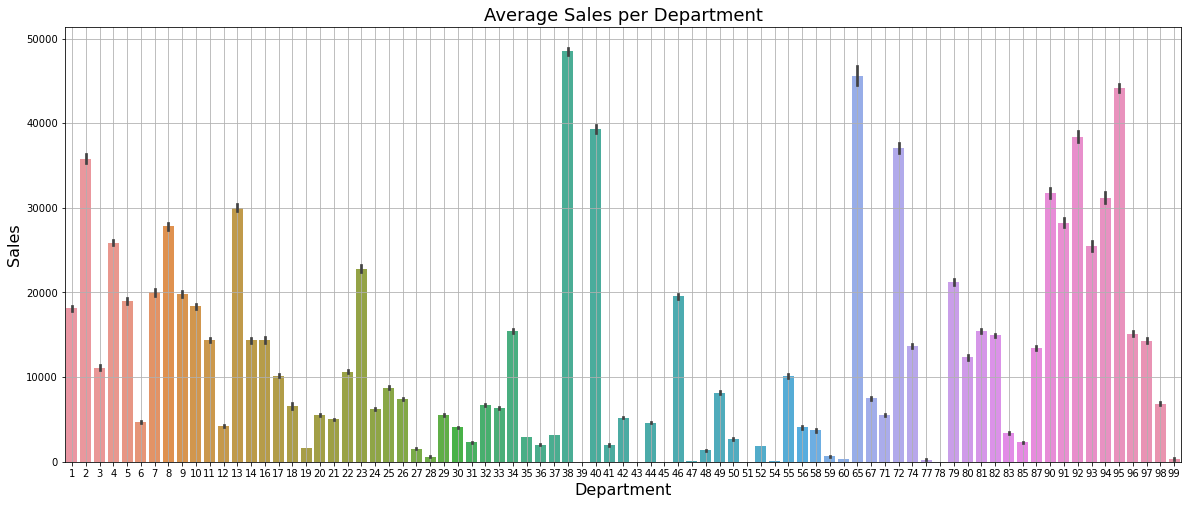

In [51]:

plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

## Sales Vs Temperature



/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


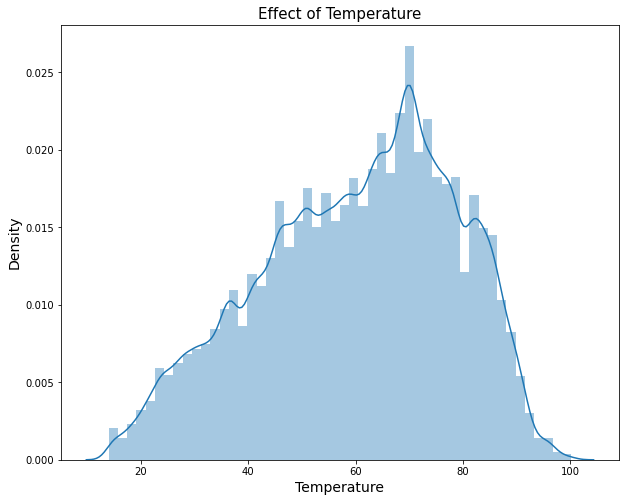

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

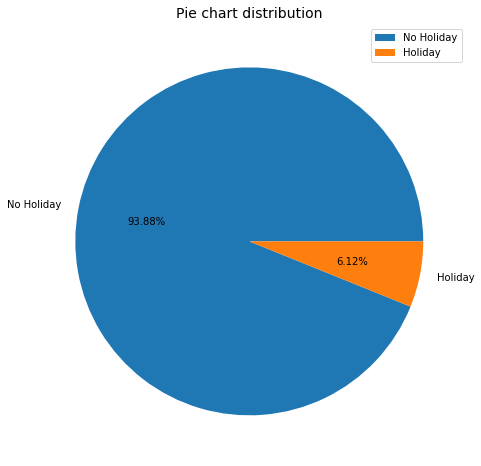

In [53]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

## Time Series Decompose


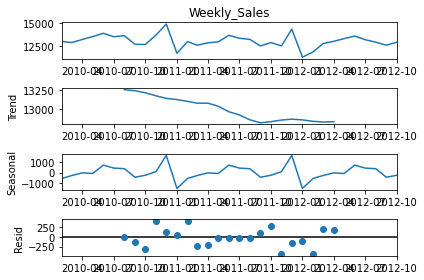

In [54]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot();


## One-hot-encoding¶


In [55]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()


In [56]:
data_cat=pd.get_dummies(data_cat, columns=cat_col)

In [57]:
data_cat.shape

(374247, 129)

In [58]:
data = pd.concat([data, data_cat],axis=1)
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# drop original categorical variable and datetime variable
data.drop(columns=cat_col,inplace=True)
data.drop(columns=['Date'],inplace=True)


In [60]:
data.shape

(374247, 145)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Columns: 145 entries, Weekly_Sales to Type_C
dtypes: float64(11), int64(5), uint8(129)
memory usage: 94.6 MB


## Data Normalization¶


In [62]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']


In [63]:
# MinMaxScaler Transform features by scaling each feature to a given range.

minmax_scale=MinMaxScaler(feature_range=(0, 1))


In [64]:
new=minmax_scale.fit_transform(data[num_col])

In [65]:
new

array([[0.34257571, 0.63026734, 0.32849512, ..., 0.20815725, 0.17321545,
        0.13827574],
       [0.00918795, 0.49233817, 0.27856479, ..., 0.00449902, 0.00476706,
        0.00408266],
       [0.00953692, 0.49233817, 0.27856479, ..., 0.00913476, 0.00896787,
        0.00431393],
       ...,
       [0.07339102, 0.91643707, 0.52217836, ..., 0.07218136, 0.06437481,
        0.07267047],
       [0.1404179 , 0.02725349, 0.70099861, ..., 0.09803654, 0.09711408,
        0.01464838],
       [0.01480012, 0.45113588, 0.52055272, ..., 0.00623368, 0.00707023,
        0.00520988]])

In [66]:
arr=np.array(data['Weekly_Sales'])

In [67]:
arr

array([24924.5 ,   668.48,   693.87, ...,  5339.65, 10216.27,  1076.8 ])

In [68]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [69]:
data=normalization(data.copy(), num_col)

In [70]:
data

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.050100,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.050100,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.050100,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.050100,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.050100,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.127259,0.906277,0.647585,0.518036,0.958935,0.275758,0,2012,10,43,...,0,0,0,0,0,0,0,1,0,0
2012-10-26,0.000730,0.026063,0.602996,0.916333,0.050698,0.760713,0,2012,10,43,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,0.073391,0.916437,0.522178,0.801102,0.165055,0.496028,0,2012,10,43,...,0,0,0,0,0,0,0,1,0,0


## Correlation between features of dataset¶


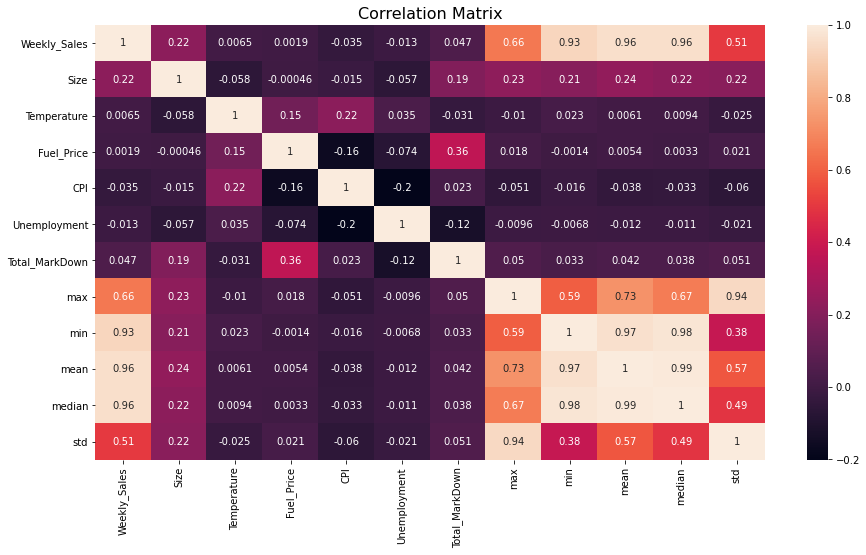

In [71]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show();

In [72]:
# We can see that max, min, mean ... have strong correlation with weekly sales, and others do not have very strong correlation 

## Data Splitted into Training, Validation, Test¶


In [73]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)


## Linear Regression Model¶


In [75]:

lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(X_test)

In [77]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030210417168526897
MSE 0.003467653576738078
RMSE 0.058886786096186965
R2 0.9231953595759389


In [78]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.131922
2010-07-09,0.364278,0.291174
2011-07-01,0.005003,0.021909
2012-01-06,0.015856,0.012725
2011-08-26,0.000318,0.000430
...,...,...
2011-01-28,0.169068,0.231474
2010-08-20,0.252860,0.234435
2010-11-26,0.265617,0.316058


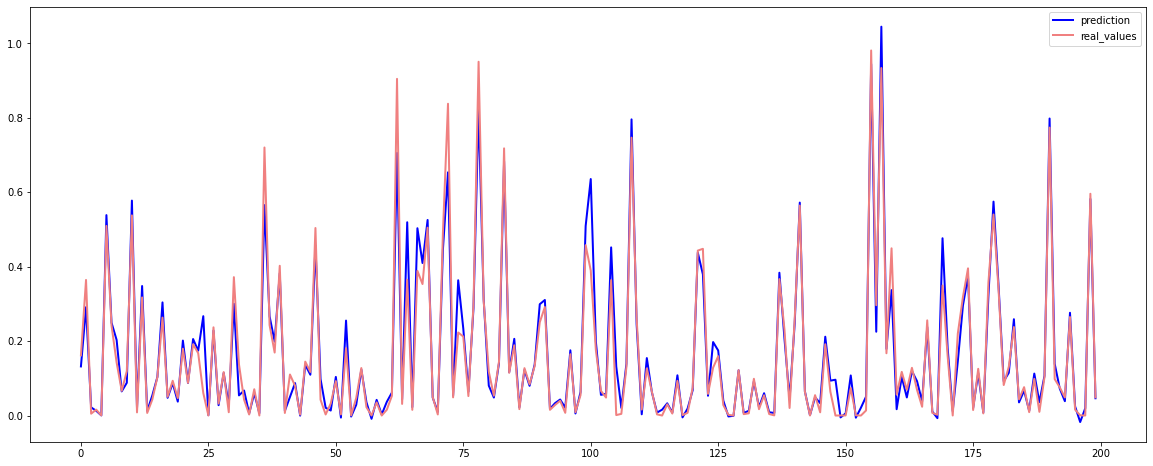

In [79]:

plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

Accuracy (e.g. classification accuracy) is a measure for classification, not regression.


There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

Mean Squared Error (MSE).
Root Mean Squared Error (RMSE).
Mean Absolute Error (MAE)


## Random Forest Regressor Model¶


In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_pred = rf.predict(X_test)

In [83]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015409945585584115
MSE 0.0009426126254158313
RMSE 0.030701997091652382
R2 0.9791223016721385


In [84]:
# Random forest regression has lower MSE, RMSE and higher R squared than linear regression

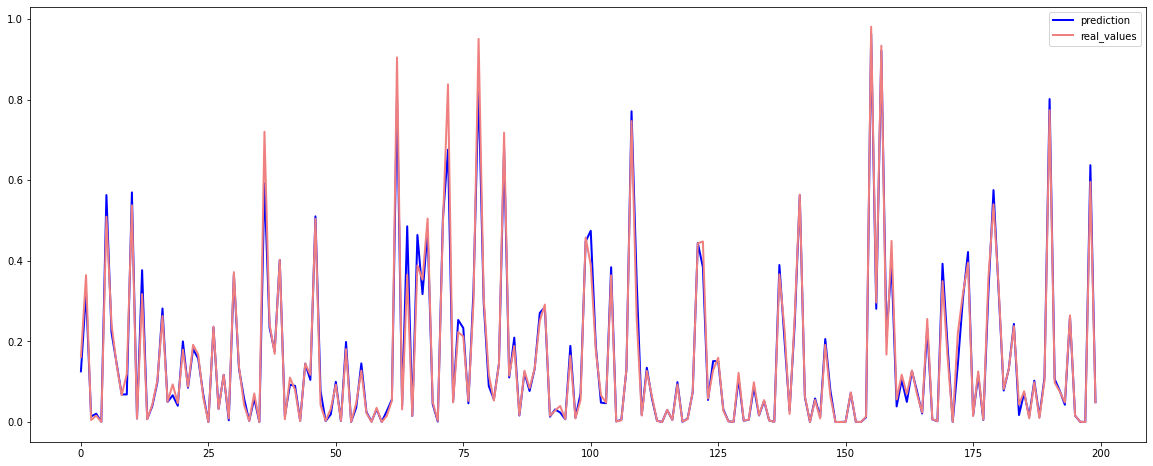

In [85]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## K Neighbors Regressor Model

In [86]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [87]:
y_pred = knn.predict(X_test)

In [88]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.02114979868450268
MSE 0.0019753663032259154
RMSE 0.04444509312877987
R2 0.9562490379821286


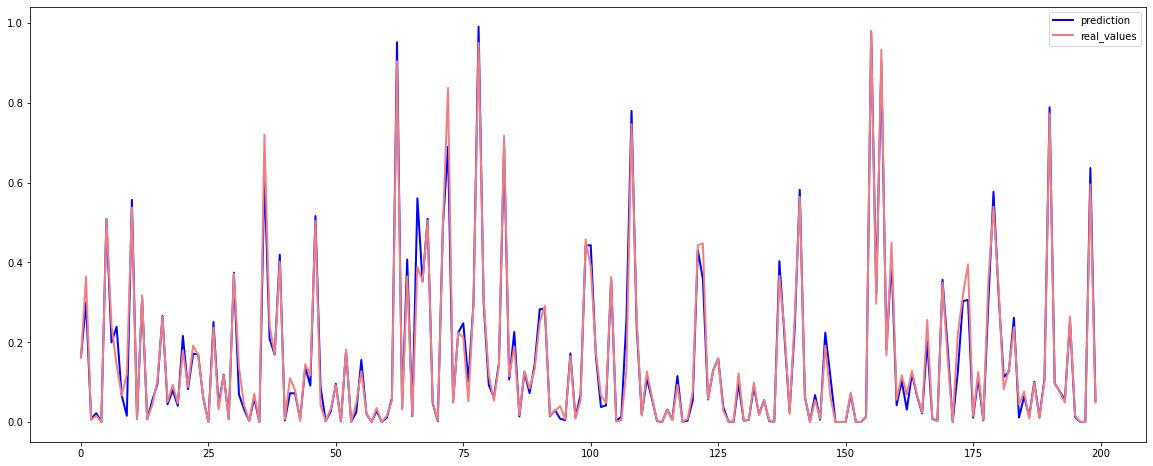

In [89]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## XGboost Model

In [90]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred = xgbr.predict(X_test)

In [92]:

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019073863313481938
MSE 0.0011505949421848332
RMSE 0.03392042072535117
R2 0.9745157665335955


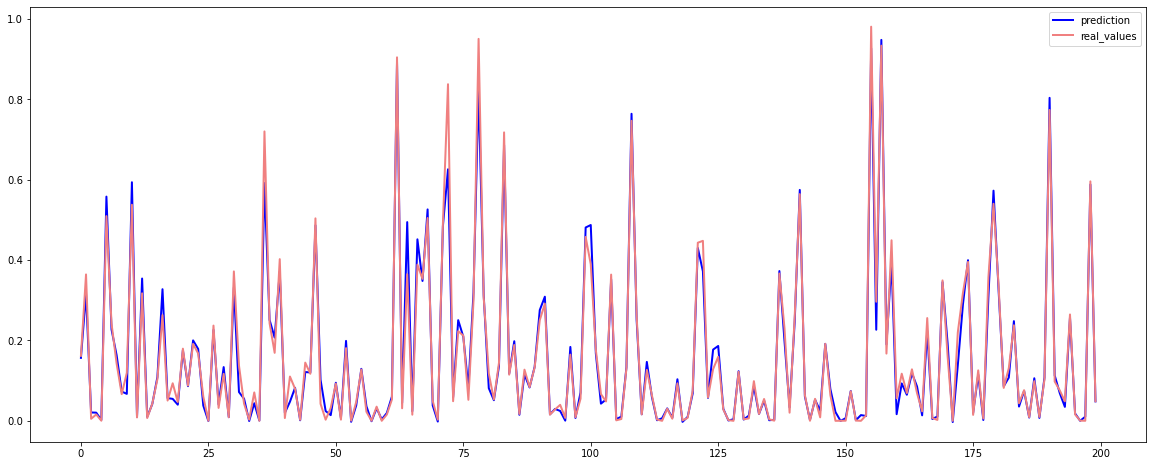

In [93]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## Custom Deep Learning Neural Network¶


In [95]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [96]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)


In [97]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)


Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 1.1547 - val_loss: 0.1865
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1709 - val_loss: 0.1504
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1822 - val_loss: 0.1793
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1877 - val_loss: 0.1561
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1488 - val_loss: 0.1168
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2614 - val_loss: 0.1988
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3675 - val_loss: 0.2000
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3151 - val_loss: 0.1815
Epoch 9/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3358 - val_loss: 0.1324
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1355 - val_loss: 0.1266
Epoch 11

In [98]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.35132719534846


In [99]:
y_pred = estimator_model.predict(X_test)


2340/2340 [==============================] - 1s 411us/step


In [100]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03917124028536683
MSE 0.00449072765024875
RMSE 0.06701289167204136
R2 0.9009247993630625


4/4 [==============================] - 0s 793us/step


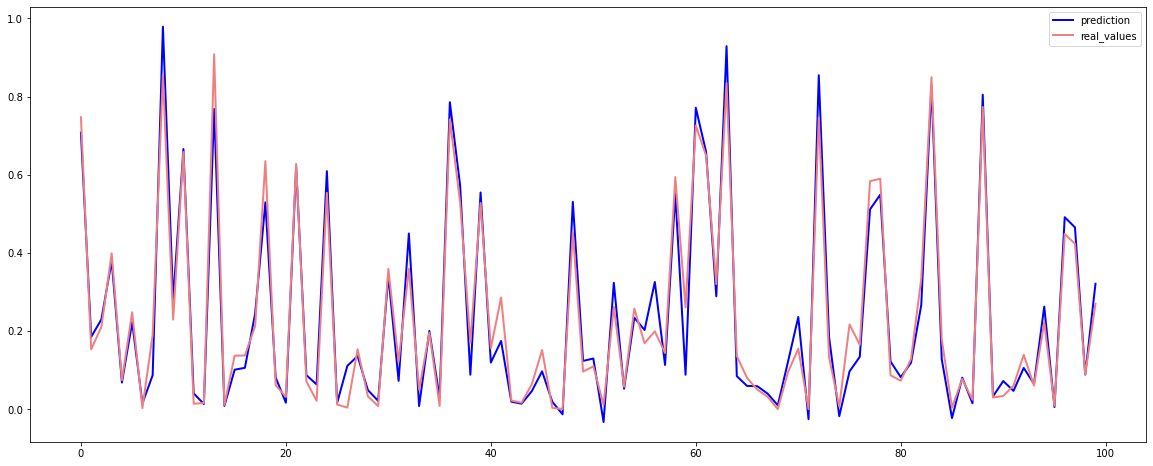

In [101]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

## Summary 

In this study, I use historical Walmart sales data to forecast future sales, and by doing so, we can help Walmart better estimate future revenue, make sufficient preparation before sales boosting or sharply decrease. Sales prediction can help businesses better allocate resources and plan sales strategies in different months. Therefore, we conduct this data science project to help the business predict future sales. 


Descriptive statistics: 
December is the month which often has the highest sales. This is probably because several holidays such as Boxing day, Christmas Day are concentrated in December. 

I did not see sales differences in terms of whether it is a holiday. 

I plotted the 45 stores' sales differences, and those stores which have lower average sales than other stores may need to design new strategies to increase their sales and revenue. 

Type A has the highest sales among the three types. 
There are three types represent Walmart Discount Store Stores, Walmart Supercenters, and Walmart Neighborhood Markets.
Type A is Walmar Supercenters.


Modeling:

I tested several machine learning algorithms including Linear regression, Random Forest Regressor, K neighbors, XGboost, and Deep learning neural network.

Random Forest Regressor models have the lowest RMSE and highest accuracy score. Based on the data visualization graph, we can see that predicate values are almost overlap with real values, and we can use this model to do our best to accurately predict future Walmart sales 

